# Import Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
os.environ['OMP_NUM_THREADS'] = '1'

# Data Exploration

In [2]:
sandi = pd.read_csv('wine_clustering.csv')

In [3]:
sandi.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
sandi.size

2314

In [5]:
sandi.shape

(178, 13)

In [6]:
sandi.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [7]:
sandi.describe() 

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


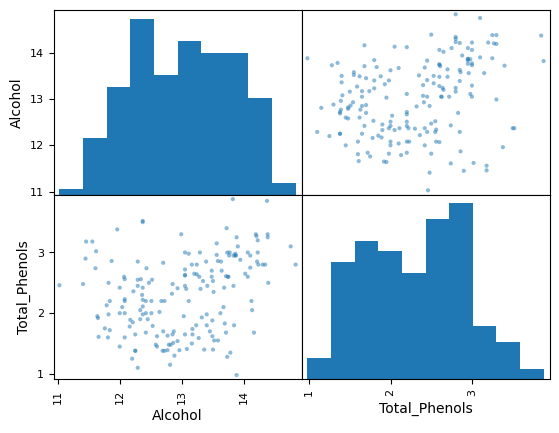

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(sandi.iloc[:,[0,5]])
plt.show() 

In [9]:
X = sandi[["Alcohol", "Total_Phenols"]]  

In [10]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

In [11]:
print(scale.mean_, "\n", scale.scale_) 

[13.00061798  2.29511236] 
 [0.80954291 0.62409056]


In [12]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)

In [13]:
def countcant(x):
    unique, counts = np.unique(x, return_counts=True)
    return np.asarray((unique,counts)).T 

In [14]:
countcant(y_pred) 

array([[ 0, 65],
       [ 1, 53],
       [ 2, 60]], dtype=int64)

In [15]:
kmeans.cluster_centers_ 

array([[ 0.92017418,  0.87087204],
       [ 0.07498401, -1.14070754],
       [-1.06309124,  0.06418028]])

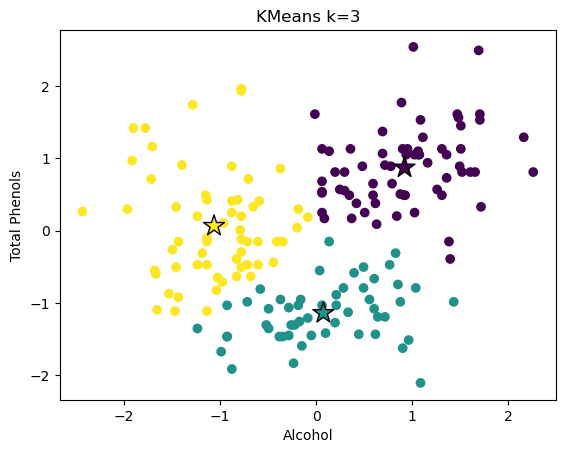

In [16]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred) 

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="*", s=250, c=[0,1,2], edgecolors="k") 

plt.xlabel("Alcohol")
plt.ylabel("Total Phenols")
plt.title("KMeans k=3")
plt.show() 

In [17]:
X_new = pd.DataFrame({"Alcohol": [13], "Total_Phenols": [2.5] }) 
X_new_scaled = scale.transform(X_new)D
kmeans.predict(X_new_scaled) 

array([0])

In [18]:
kmeans.inertia_ 

114.34674038310783

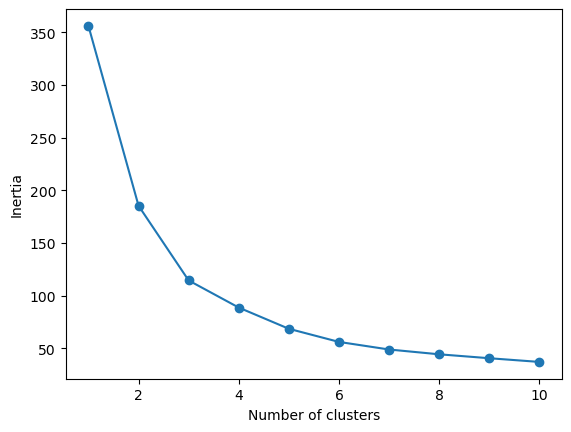

In [19]:
inertia = []
for i in np.arange(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
plt.plot(np.arange(1,11), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show() 